In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
path = tf.keras.utils.get_file('reviews.csv', 
                               'https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P')
print (path)

131072/127831 [==============================] - 0s 0us/step
/root/.keras/datasets/reviews.csv


In [3]:
# Take a look

dataset = pd.read_csv(path)

dataset.head()

,Unnamed: 0,text,sentiment
0,0,So there is no way for me to plug it in here i...,0
1,1,Good case Excellent value.,1
2,2,Great for the jawbone.,1
3,3,Tied to charger for conversations lasting more...,0
4,4,The mic is great.,1


In [4]:
dataset.info

<bound method DataFrame.info of       Unnamed: 0                                               text  sentiment
0              0  So there is no way for me to plug it in here i...          0
1              1                         Good case Excellent value.          1
2              2                             Great for the jawbone.          1
3              3  Tied to charger for conversations lasting more...          0
4              4                                  The mic is great.          1
...          ...                                                ...        ...
1987        1987  I think food should have flavor and texture an...          0
1988        1988                           Appetite instantly gone.          0
1989        1989  Overall I was not impressed and would not go b...          0
1990        1990  The whole experience was underwhelming and I t...          0
1991        1991  Then as if I hadn't wasted enough of my life t...          0

[1992 rows x 3 colu

## Formatting Data

In [0]:
# Put into lists:

sentences = dataset['text'].tolist()
labels = dataset['sentiment'].tolist()

# Split into train and text:

training_size = int(len(sentences) * 0.8)

training_sentences = sentences[0 : training_size]
testing_sentences = sentences[training_size : ]
training_labels = labels[0: training_size]
testing_labels = labels[training_size : ]

# Put labels into array:

training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

## Preparing Data

In [0]:
vocab_size = 500
embedding_dim = 16
max_length = 50
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'

In [0]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

## Building the Model

In [15]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Dense(6, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 50, 16)            8000      
_________________________________________________________________
global_average_pooling1d_2 ( (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 102       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 8,109
Trainable params: 8,109
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              optimizer='adam',
              metrics=['accuracy'])

In [17]:
num_epochs = 100

modelo = model.fit(training_padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/100
50/50 [==============================] - 0s 5ms/step - loss: 0.6916 - accuracy: 0.5223 - val_loss: 0.6996 - val_accuracy: 0.4110
Epoch 2/100
50/50 [==============================] - 0s 4ms/step - loss: 0.6892 - accuracy: 0.5223 - val_loss: 0.6994 - val_accuracy: 0.4185
Epoch 3/100
50/50 [==============================] - 0s 4ms/step - loss: 0.6859 - accuracy: 0.5292 - val_loss: 0.6937 - val_accuracy: 0.4687
Epoch 4/100
50/50 [==============================] - 0s 4ms/step - loss: 0.6812 - accuracy: 0.5637 - val_loss: 0.6920 - val_accuracy: 0.4787
Epoch 5/100
50/50 [==============================] - 0s 4ms/step - loss: 0.6745 - accuracy: 0.5782 - val_loss: 0.6866 - val_accuracy: 0.5063
Epoch 6/100
50/50 [==============================] - 0s 4ms/step - loss: 0.6651 - accuracy: 0.6102 - val_loss: 0.6770 - val_accuracy: 0.5439
Epoch 7/100
50/50 [==============================] - 0s 4ms/step - loss: 0.6519 - accuracy: 0.6711 - val_loss: 0.6704 - val_accuracy: 0.5514
Epoch 8/100
5

## Exploring results

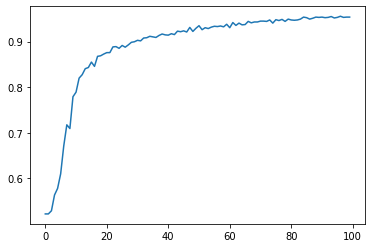

In [18]:
plt.plot(modelo.history['accuracy'])

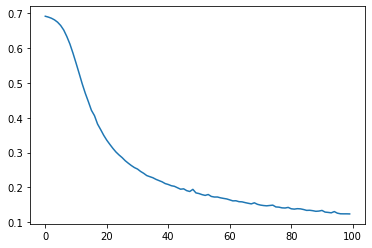

In [19]:
plt.plot(modelo.history['loss'])

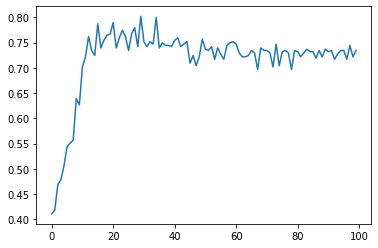

In [20]:
plt.plot(modelo.history['val_accuracy'])

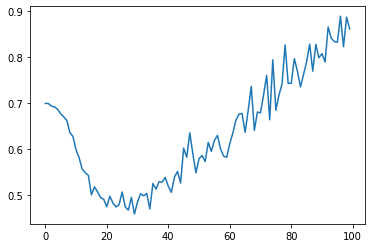

In [21]:
plt.plot(modelo.history['val_loss'])